---
##**PUC-RIO**
- **Curso**: CIÊNCIAS DE DADOS E ANALYTICS
- **Sprint**: Machine Learning & Analytics
- **Nome**: Fabiane Silveira da Silva
- **Matrícula:** 4052024001716

- **Dataset original**:https://github.com/Shravanipatil23/Customer-Segmentation-And-Recommendation-System.git


---



##🎯 **MVP - Preditor de Satisfação do Cliente (NPS) para E-commerce**

---

##**Índice**
- [1) Resumo Executivo](#sec1)
- [2) Objetivo & Escopo](#sec2)
- [3) Dados & Dicionário](#sec3)
- [4) ETL / EDA](#sec4)
  - [4.1 Sanity checks](#sec41)
  - [4.2 Estatísticas + simetria](#sec42)
  - [4.3 Histogramas](#sec43)
  - [4.4 Outliers (IQR)](#sec44)
- [5) Definição do Alvo (Target)](#sec5)
- [6) Split Treino/Teste (Estratificado)](#sec6)
- [7) Pipeline de Pré-processamento](#sec7)
- [8) Modelagem](#sec8)
  - [8.1 Regressão Logística (baseline)](#sec81)
  - [8.2 Regressão Logística (balanced)](#sec82)
  - [8.3 Random Forest (balanced)](#sec83)
  - [8.4 LR vs RF — prós e contras](#sec84)
- [9) Resultados & Validação](#sec9)
  - [9.1 Matriz de confusão](#sec91a)
  - [9.1 Comparação de F1-macro](#sec91b)
  - [9.2 Validação Cruzada (5-fold)](#sec92)
  - [9.3 Importâncias + Insights por Marca](#sec93)
- [10) Entrega & Operação](#sec10)
  - [10.1 Salvar Artefatos](#sec101)
  - [10.2 Inferência](#sec102)
  - [10.3 Monitoramento & Drift](#sec103)
  - [10.4 Plano de Re-Treino](#sec104)
  - [10.5 Conclusão do MVP](#sec105)
- [11) Checklist — Perguntas & Respostas](#sec11)


<a name="sec1"></a>

---


# **1) Resumo Executivo**



##**1. Resumo**

Recomendações genéricas em e-commerce resultam em baixa fidelidade, clientes insatisfeitos e perda de vendas. O desafio é identificar proativamente quem são nossos Promotores (potenciais embaixadores) e Detratores (clientes em risco de abandono).

O MVP é um modelo de Machine Learning que analisa o comportamento de compra e as características dos produtos para classificar cada cliente em Promotor, Neutro ou Detrator. Isso permite ações proativas de marketing e retenção, aumentando a fidelidade de forma eficiente.

Os resultados foram obtidos através de experimentos de aprendizagem de máquina, testando algoritmos como Regressão Logística,Random Fores para garantir a melhor performance de classificação.

---

## **1.1 Introdução: A Importância da Personalização**

Em um mercado de **e-commerce competitivo**, **conhecer o comportamento de compra individual** é crucial para a retenção e o engajamento. Consumidores estão mais exigentes e esperam que as plataformas **compreendam suas preferências** para entregar recomendações relevantes, economizando tempo e aumentando a satisfação.

Neste contexto, a **classificação da satisfação** com base em características do produto, da interação e do cliente permite traduzir o sentimento do cliente em ações estratégicas. Isso torna os sistemas de classificação centrais para a gestão de relacionamento essenciais, pois ajudam a **priorizar a retenção** (**Detratores**) e a **ativar *referrals*** (**Promotores**), superando a baixa efetividade das abordagens genéricas.

---

##**1.2 Objetivo do Projeto**

O objetivo principal deste projeto é **construir um modelo de classificação multiclasse** capaz de rotular interações de *e-commerce* como **Promotor, Neutro ou Detrator**.

##Lógica de Classificação:

A classificação (Alvo) é derivada da variável `Probability for the product to be recommended to the person`, seguindo a regra de negócio abaixo:

| Classe | Regra de Probabilidade |
| :--- | :--- |
| **Detrator** | $\le 0.60$ |
| **Neutro** | $(0.60, 0.80]$ |
| **Promotor** | $> 0.80$ |

---

##**1.3 Hipóteses e Valor Estratégico**

## Hipótese Central
A aplicação de **aprendizado de máquina supervisionado** pode classificar interações com alta acurácia (Promotor/Neutro/Detrator), com base na combinação das seguintes variáveis:
- **Comportamento do Cliente:** (Cliques, avaliações anteriores, etc.)
- **Características do Produto:** (Preço, marca, nota do produto)
- **Contexto da Compra:** (Feriados, estação do ano, localização geográfica)

## Valor Estratégico (Benefícios para a Empresa)
A classificação individualizada do cliente permite ações estratégicas e otimizadas nas seguintes frentes:

* **Fidelização e Retenção:**
    * Priorizar clientes **Detratores** para ações de retenção (ex: cupons, melhorias de serviço).
    * Focar clientes **Promotores** para campanhas de *referral* (indicação).
* **Marketing e Vendas:**
    * Orientar ações de marketing e recomendação de forma mais precisa.
    * **Melhorar a taxa de conversão** de recomendações.
    * **Reduzir o abandono de carrinho**.
    * Oferecer campanhas de marketing mais direcionadas.

## Insights Gerados pelo Modelo
O modelo não só classifica, mas também fornece *insights* estratégicos sobre a satisfação:

* **Identificação de Fraquezas:** Produtos de determinada marca/categoria tendem a gerar mais Detratores.
* **Fatores de Neutralidade:** Entender o que gera neutralidade (ex: gênero + estação + preço alto) para refinar o catálogo.
* **Força de Vendas:** Maior sentimento positivo e avaliações altas aumentam a chance de gerar Promotores.

---

##**1.4 Restrições e Condições de Escopo do MVP**

O escopo do MVP está delimitado pelas seguintes condições:

### Condições do Dataset
* **Escopo Temporal:** O modelo é baseado em transações históricas de *e-commerce* limitadas ao período de **2010 a 2011**.
* **Pré-filtro de Dados:** O *dataset* já foi pré-filtrado, focando em produtos com informações consideradas relevantes (nota, marca, cliques, etc.).

### Restrições Técnicas
* **Validação de Nulos:** O foco é em produtos com atributos completos. A integridade final (confirmação de dados ausentes/nulos) será validada na etapa de **Exploração dos Dados (EDA)**.
* **Output do Modelo:** O projeto se restringe à **Classificação Multiclasse** para gerar, exclusivamente, as três classes: **Promotor, Neutro e Detrator**.


---


##**1.5 Tipo de Problema**

Este é um problema de **Aprendizado Supervisionado**, mais especificamente de **Classificação Multiclasse**.

O modelo irá aprender, a partir de **exemplos históricos** (interações já classificadas), a prever a classe (Promotor, Neutro ou Detrator) de uma nova amostra (combinação de cliente e produto).

---

##**1.6 Área de Aplicação**

O projeto está inserido na área de análise de **Dados Tabulares Estruturados**, provenientes de registros transacionais de e-commerce.

A modelagem utiliza um conjunto de **variáveis categóricas e numéricas** que descrevem o produto, o cliente e o contexto da compra.

---
##**1.7 Modelagem**

**Modelos testados:**
1) **Regressão Logística (baseline)** — referência simples.  
2) **Regressão Logística (class_weight='balanced')** — corrige desbalanceamento.  
3) **Random Forest (class_weight='balanced')** — não linearidades/interações (**modelo campeão**).

---


##**1.8 Dataset e Atributos**

* **Fonte:** Obtido publicamente no GitHub: `Customer Segmentation and Recommendation System`.
* **Tamanho:** **1474 amostras** (linhas), cada uma representando um evento de interação ou compra.
* **Atributos:** 13 atributos, sendo 8 numéricos e 5 categóricos.

### 🔢 Atributos Numéricos (8)
Estes atributos representam quantidades, avaliações, preços e a probabilidade de recomendação (que será usada para derivar a classe **Alvo**).

| Atributo | Descrição | Tipo de Dado (Original) |
| :--- | :--- | :--- |
| `Number of clicks on similar products` | Número de cliques em produtos similares | `int64` |
| `Number of similar products purchased so far` | Qtd. de produtos similares já comprados | `int64` |
| `Average rating given to similar products` | Média de avaliações dadas a produtos similares | `float64` |
| `Median purchasing price (in rupees)` | Preço mediano de compra | `float64` |
| `Rating of the product` | Avaliação do produto | `int64` |
| `Customer review sentiment score (overall)` | Pontuação de sentimento geral da avaliação do cliente | `float64` |
| `Price of the product` | Preço do produto | `float64` |
| **ALVO:** `Probability for the product...` | **Probabilidade do produto ser recomendado ao cliente** (Usada para definir Promotor/Neutro/Detrator) | `float64` |

### 🔠 Atributos Categóricos (5)
Estes atributos fornecem informações qualitativas sobre o cliente, o produto ou o contexto da compra.

| Atributo | Descrição | Tipo de Dado (Original) |
| :--- | :--- | :--- |
| `Gender` | Gênero do cliente | `object` |
| `Brand of the product` | Marca do produto | `object` |
| `Holiday` | Feriado (se a compra ocorreu em um) | `object` |
| `Season` | Estação do ano | `object` |
| `Geographical locations` | Localização geográfica do cliente | `object` |

<a name="sec2"></a>
# 2) Objetivo & Escopo


- Classificar cada evento em **Detrator / Neutro / Promotor** para apoiar ações de CRM/marketing. A métrica foco é **F1-macro**, com atenção ao **F1 da classe Neutro** (zona cinza). Escopo: MVP offline com pipeline replicável e artefatos de entrega.

<a name="sec3"></a>
# 3) Dados & Dicionário

In [1]:
# 3.0) Ambiente (versões + seed)
import sys, numpy as np, pandas as pd, sklearn, random
SEED = 42
random.seed(SEED); np.random.seed(SEED)
print(f"Python {sys.version.split()[0]} | numpy {np.__version__} | pandas {pd.__version__} | scikit-learn {sklearn.__version__}")


Python 3.12.11 | numpy 2.0.2 | pandas 2.2.2 | scikit-learn 1.6.1


In [2]:
# 3.1) Imports e setup
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

RANDOM_STATE = 42
pd.set_option("display.max_columns", None)


In [3]:
# 3.2)

# Carga do dataset (com encoding para evitar problemas de acentuação)
url = "https://raw.githubusercontent.com/fabsy381/MVP-Machine-Learning/main/Dataset.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")

#print("Shape:", df.shape)
display(df.head(3))

# Informações básicas
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")


# Tipos de dados e valores nulos
print("\n -->Estrutura do dataset:")
print(df.info())

duplicates = df.duplicated().sum()
print(f" -->Linhas duplicadas encontradas: {duplicates}")

print("\n -->Nulos (% por coluna):")
null_pct = (df.isna().mean()*100).sort_values(ascending=False).round(2)
display(null_pct)
##

,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
0,12,4,4.2,male,500,4.5,PUMA,0.8,200,No,winter,plains,0.9
1,8,2,3.8,female,3000,3.2,Lee,-0.4,300,Yes,monsoon,mountains,0.2
2,25,10,4.5,female,600,4.8,Head Hunters,0.6,1000,No,spring,plains,0.7


O dataset possui 1474 linhas e 13 colunas.

 -->Estrutura do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 13 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Number of clicks on similar products                         1474 non-null   int64  
 1   Number of similar products purchased so far                  1474 non-null   int64  
 2   Average rating given to similar products                     1474 non-null   float64
 3   Gender                                                       1474 non-null   object 
 4   Median purchasing price (in rupees)                          1474 non-null   int64  
 5   Rating of the product                                        1474 non-null   float64
 6   Brand of the product                                         1474 non-null   object 
 7   Customer

,0
Number of clicks on similar products,0.0
Number of similar products purchased so far,0.0
Average rating given to similar products,0.0
Gender,0.0
Median purchasing price (in rupees),0.0
Rating of the product,0.0
Brand of the product,0.0
Customer review sentiment score (overall),0.0
Price of the product,0.0
Holiday,0.0


<a name="sec4"></a>
# 4) ETL / EDA

- ETL (Extrair, Transformar, Carregar): Preparar dados para análise e armazenamento, consolidando-os em um formato utilizável.

 - EDA, ou Análise Exploratória de Dados, é uma abordagem que utiliza métodos estatísticos e de visualização para entender os conjuntos de dados, identificar padrões, anomalias e relações entre variáveis, e avaliar a qualidade dos dados.



<a name="sec41"></a>
## 4.1 Sanity checks (nulos, duplicatas, tipos)


In [4]:
# === 0) Config ===
TARGET_PROB = "Probability for the product to be recommended to the person"

# === 1) Remover duplicatas exatas ===
before = len(df)
df = df.drop_duplicates()
print(f"Duplicatas removidas: {before - len(df)}")

# === 2) Padronizar textos categóricos (strip + lower) ===
cat_cols = [c for c in ["Gender","Brand of the product","Holiday","Season","Geographical locations"] if c in df.columns]
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip()

# Campos com dicionário conhecido: normalizar valores
if "Holiday" in df.columns:
    map_holiday = {"yes":"Yes","y":"Yes","true":"Yes","sim":"Yes","1":"Yes",
                   "no":"No","n":"No","false":"No","nao":"No","0":"No"}
    df["Holiday"] = df["Holiday"].str.lower().map(map_holiday).fillna(df["Holiday"])

if "Season" in df.columns:
    map_season = {"summer":"summer","verao":"summer",
                  "winter":"winter","inverno":"winter",
                  "spring":"spring","primavera":"spring",
                  "monsoon":"monsoon","rainy":"monsoon",
                  "autumn":"autumn","fall":"autumn"}
    df["Season"] = df["Season"].str.lower().map(map_season).fillna(df["Season"])

if "Gender" in df.columns:
    map_gender = {"male":"male","m":"male","masculino":"male",
                  "female":"female","f":"female","feminino":"female",
                  "other":"other","o":"other","na":"other","none":"other"}
    low = df["Gender"].str.lower()
    df["Gender"] = low.map(map_gender).fillna(df["Gender"])

# === 3) Filtrar valores impossíveis nas numéricas ===
num_checks = {
    "Number of clicks on similar products": {"min": 0},
    "Number of similar products purchased so far": {"min": 0},
    "Average rating given to similar products": {"min": 0, "max": 5},
    "Rating of the product": {"min": 0, "max": 5},
    "Customer review sentiment score (overall)": {"min": 0, "max": 1},
    "Price of the product": {"min_exclusive": 0},
    "Median purchasing price (in rupees)": {"min_exclusive": 0},
}

removed = 0
for col, rules in num_checks.items():
    if col not in df.columns:
        continue
    mask_ok = pd.Series(True, index=df.index)
    if "min" in rules:
        mask_ok &= df[col] >= rules["min"]
    if "max" in rules:
        mask_ok &= df[col] <= rules["max"]
    if "min_exclusive" in rules:
        mask_ok &= df[col] > rules["min_exclusive"]
    to_drop = (~mask_ok).sum()
    if to_drop:
        removed += to_drop
        df = df[mask_ok]
print(f"Linhas removidas por valores impossíveis: {removed}")

# === 4) Remover linhas sem a probabilidade (não imputar alvo) ===
if TARGET_PROB in df.columns:
    missing_target = df[TARGET_PROB].isna().sum()
    df = df.dropna(subset=[TARGET_PROB])
    print(f"Linhas sem '{TARGET_PROB}' removidas: {missing_target}")

# === 5) Resumo pós-limpeza ===
print("Shape pós-ETL leve:", df.shape)
print("Nulos (% top 5):")
print((df.isna().mean().sort_values(ascending=False).head(5)*100).round(2))


Duplicatas removidas: 456
Linhas removidas por valores impossíveis: 249
Linhas sem 'Probability for the product to be recommended to the person' removidas: 0
Shape pós-ETL leve: (769, 13)
Nulos (% top 5):
Number of clicks on similar products           0.0
Number of similar products purchased so far    0.0
Average rating given to similar products       0.0
Gender                                         0.0
Median purchasing price (in rupees)            0.0
dtype: float64


<a name="sec42"></a>
## 4.2 Estatísticas descritivas (num/cat) + simetria

- Como interpretação dos resultados:
skew > 0 → cauda à direita; skew < 0 → cauda à esquerda.

- Se abs_diff_pct for alto, a variável é assimétrica (média distante da mediana).

In [5]:
import numpy as np, pandas as pd

# detectar tipos
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

# --- numéricas: describe + mediana + skew + diferença média~mediana
desc = df[num_cols].describe().T
desc["median"] = df[num_cols].median()
desc["skew"] = df[num_cols].skew()
desc["mean_minus_median"] = desc["mean"] - desc["median"]
desc["abs_diff_pct"] = (desc["mean_minus_median"].abs() / (desc["median"].replace(0,np.nan))).round(3)
desc


Numéricas: ['Number of clicks on similar products', 'Number of similar products purchased so far', 'Average rating given to similar products', 'Median purchasing price (in rupees)', 'Rating of the product', 'Customer review sentiment score (overall)', 'Price of the product', 'Probability for the product to be recommended to the person']
Categóricas: ['Gender', 'Brand of the product', 'Holiday', 'Season', 'Geographical locations']


,count,mean,std,min,25%,50%,75%,max,median,skew,mean_minus_median,abs_diff_pct
Number of clicks on similar products,769.0,25.188557,11.234460,3.00,16.0,24.00,34.00,55.0,24.00,0.260406,1.188557,0.050
Number of similar products purchased so far,769.0,10.834850,5.200664,0.00,7.0,11.00,15.00,24.0,11.00,0.101775,-0.165150,0.015
Average rating given to similar products,769.0,4.293238,0.586130,1.50,4.0,4.50,4.80,5.0,4.50,-1.193642,-0.206762,0.046
Median purchasing price (in rupees),769.0,3754.291287,3435.217204,100.00,700.0,2500.00,6000.00,19000.0,2500.00,0.863541,1254.291287,0.502
Rating of the product,769.0,4.391938,0.544157,2.00,4.1,4.60,4.80,5.0,4.60,-1.222437,-0.208062,0.045
Customer review sentiment score (overall),769.0,0.688036,0.249642,0.00,0.6,0.80,0.90,1.0,0.80,-1.192070,-0.111964,0.140
Price of the product,769.0,1577.737321,2388.255188,90.00,500.0,800.00,1000.00,10000.0,800.00,2.535072,777.737321,0.972
Probability for the product to be recommended to the person,769.0,0.784746,0.215268,0.05,0.7,0.85,0.95,1.0,0.85,-1.397574,-0.065254,0.077


In [6]:
# --- categóricas: cardinalidade e top categorias
summary_cat = {}
for c in cat_cols:
    vc = df[c].value_counts(dropna=False)
    summary_cat[c] = {
        "n_unique": int(vc.shape[0]),
        "top5": (vc.head(5) / len(df)).round(3).astype(float)
    }

for c, info in summary_cat.items():
    print(f"\n== {c} ==")
    print("n_unique:", info["n_unique"])
    print("top5 (proporção):")
    print(info["top5"])



== Gender ==
n_unique: 2
top5 (proporção):
Gender
male      0.566
female    0.434
Name: count, dtype: float64

== Brand of the product ==
n_unique: 45
top5 (proporção):
Brand of the product
Wildcraft                          0.079
Manyavar Mohey                     0.059
Lee                                0.053
Patanjali Ayurved (Health Care)    0.052
Flying Machine                     0.047
Name: count, dtype: float64

== Holiday ==
n_unique: 2
top5 (proporção):
Holiday
Yes    0.542
No     0.458
Name: count, dtype: float64

== Season ==
n_unique: 4
top5 (proporção):
Season
winter     0.420
summer     0.412
monsoon    0.107
spring     0.061
Name: count, dtype: float64

== Geographical locations ==
n_unique: 3
top5 (proporção):
Geographical locations
plains       0.521
mountains    0.315
coastal      0.164
Name: count, dtype: float64


<a name="sec43"></a>
## 4.3 Histogramas (numéricas)

- Visualizar a forma como cada variável numérica se comporta, ajuda a identificar assimetria, concentração de valores e outliers de forma visual.

- Um gráfico matplotlib por variável.





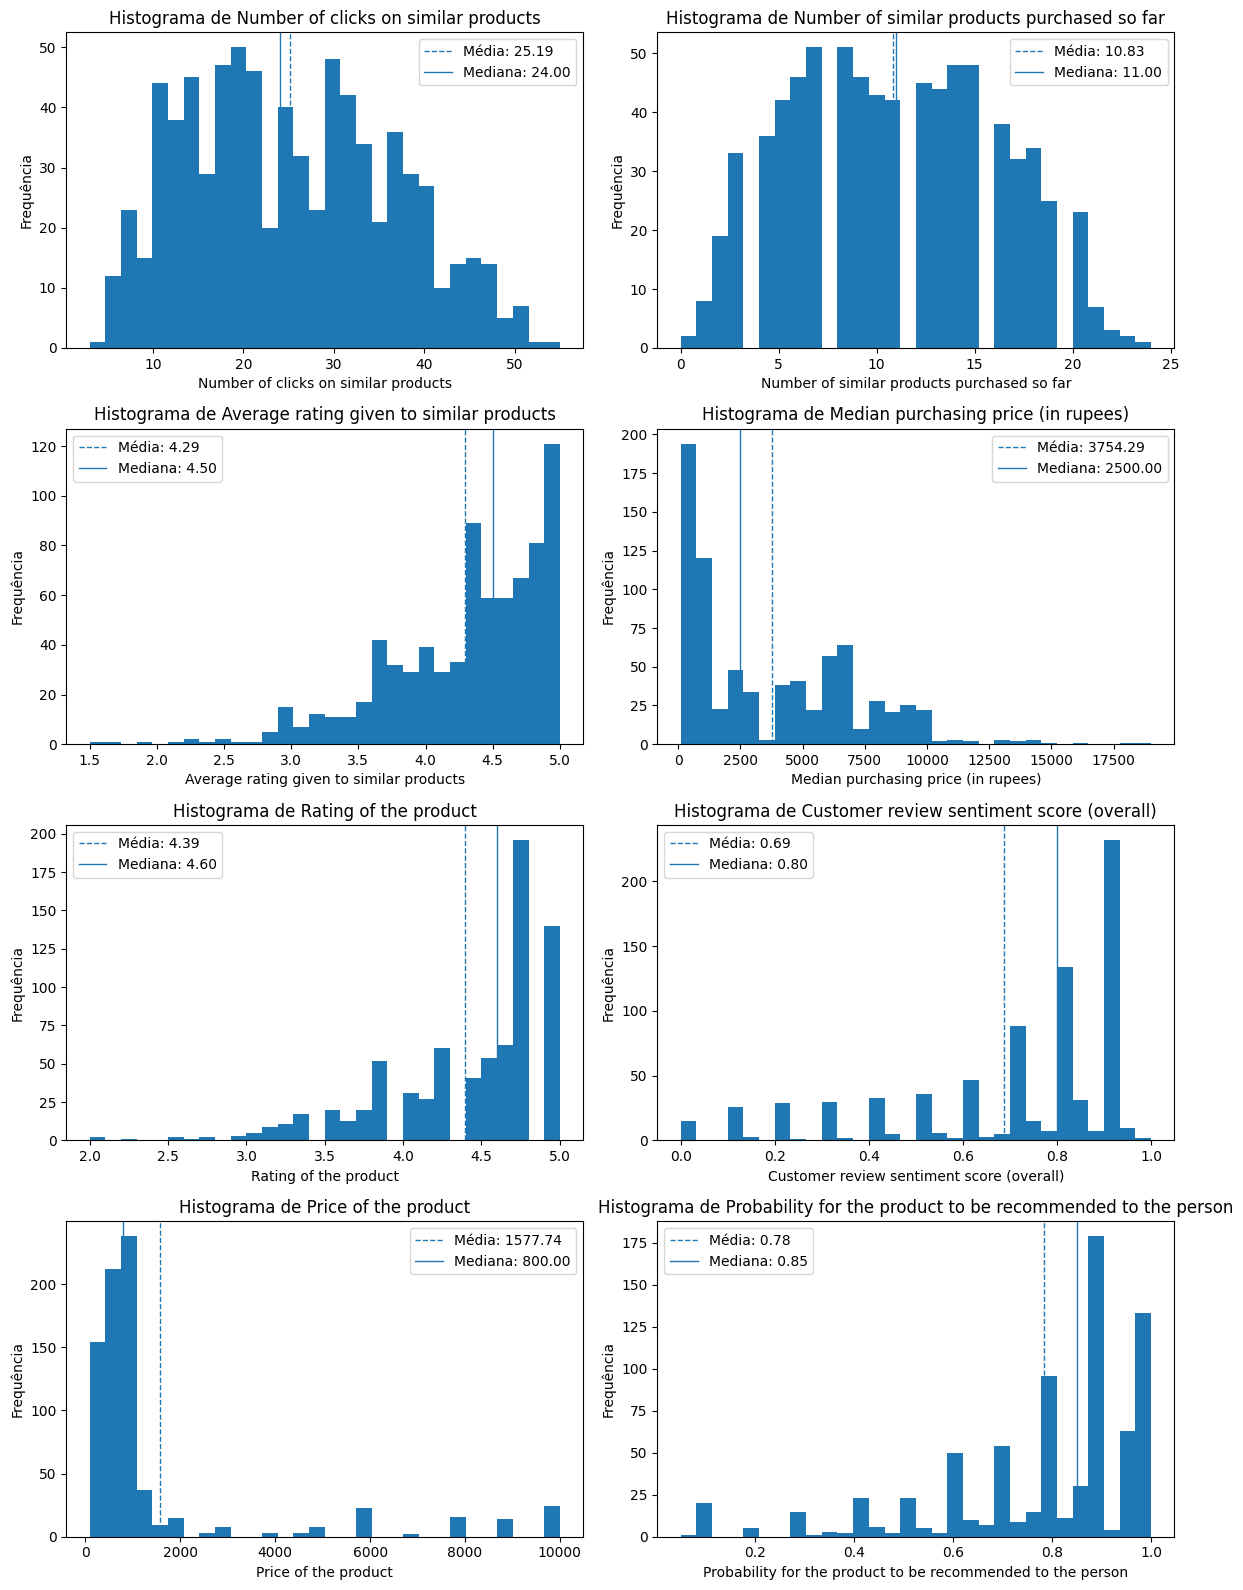

In [7]:
# 📊 Histogramas das Variáveis Numéricas

import math
import matplotlib.pyplot as plt

# selecionar somente colunas numéricas e remover o alvo, se existir
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "Recommended" in num_cols:
    num_cols.remove("Recommended")

if len(num_cols) == 0:
    raise ValueError("Não há colunas numéricas (além de 'Recommended') para plotar.")

# parâmetros da grade
ncols = 2
n = len(num_cols)
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4*nrows))
# garantir que axes seja um array 2D
axes = np.array(axes).reshape(nrows, ncols)

for idx, col in enumerate(num_cols):
    r, c = divmod(idx, ncols)
    ax = axes[r, c]
    data = df[col].dropna()

    # histograma
    ax.hist(data, bins=30)

    # linhas de média e mediana
    mean_val = data.mean()
    med_val  = data.median()
    ax.axvline(mean_val, linestyle="dashed", linewidth=1, label=f"Média: {mean_val:.2f}")
    ax.axvline(med_val,  linewidth=1,            label=f"Mediana: {med_val:.2f}")

    # rótulos
    ax.set_title(f"Histograma de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequência")
    ax.legend()

# remover subplots “sobrando” se o número de colunas não preencher a grade
last_idx = n - 1
for j in range(last_idx + 1, nrows * ncols):
    r, c = divmod(j, ncols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

<a name="sec44"></a>
## 4.4 Outliers (IQR — diagnóstico)

- Verificação se há colunas com outliers.

- A tratativa de outliers será realizada no Pipeline (fit no treino, aplica no teste).

In [8]:
iqr_report = []
for c in num_cols:
    q1, q3 = df[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    n_low = int((df[c] < lo).sum())
    n_high = int((df[c] > hi).sum())
    iqr_report.append({"col": c, "q1": q1, "q3": q3, "lo": lo, "hi": hi, "out_low": n_low, "out_high": n_high})
pd.DataFrame(iqr_report).sort_values(["out_low","out_high"], ascending=False)


,col,q1,q3,lo,hi,out_low,out_high
7,Probability for the product to be recommended ...,0.7,0.95,0.325,1.325,42,0
5,Customer review sentiment score (overall),0.6,0.90,0.150,1.350,41,0
2,Average rating given to similar products,4.0,4.80,2.800,6.000,16,0
4,Rating of the product,4.1,4.80,3.050,5.850,16,0
6,Price of the product,500.0,1000.00,-250.000,1750.000,0,119
3,Median purchasing price (in rupees),700.0,6000.00,-7250.000,13950.000,0,7
0,Number of clicks on similar products,16.0,34.00,-11.000,61.000,0,0
1,Number of similar products purchased so far,7.0,15.00,-5.000,27.000,0,0


# 4) Resumo:

-	Shape após limpeza: 769 linhas × 13 colunas (12 features + 1 prob. que gera o alvo).
-	Remoções: 456 duplicatas e 249 linhas inválidas; 0 linhas sem a probabilidade.
-	Nulos: 0% nas colunas usadas.


-	Numéricas (7):
o	Cauda forte: Price of the product (skew ≈ 2.53).
o	Cauda moderada: Median purchasing price (in rupees) (skew ≈ 0.86).
o	Demais (cliques, compras similares, ratings, sentimento) com assimetria baixa/esperada.

-	Categóricas (5): Gender, Brand, Holiday, Season, Geographical locations.
o	Brand/Geography têm várias categorias (OK para One-Hot com handle_unknown="ignore").
-	Outliers (IQR): presentes em preços (comportamento típico). Decisão: não tratar no df; se necessário, tratar no Pipeline em versões futuras (sem vazamento).


<a name="sec5"></a>
##5) Definição do Alvo (Target)


- Em Machine Learning, target (ou variável alvo) é a variável ou métrica que o modelo é treinado para prever ou classificar.

- Em problema de Classificação: A variável alvo é uma categoria ou um valor discreto.

In [9]:
# 3) Criar target a partir da probabilidade
TARGET_PROB = "Probability for the product to be recommended to the person"

def to_class(p):
    if p <= 0.60:
        return "Detrator"
    elif p <= 0.80:
        return "Neutro"
    else:
        return "Promotor"

df["target"] = df[TARGET_PROB].apply(to_class)

print(df["target"].value_counts())
print((df["target"].value_counts(normalize=True)*100).round(1).astype(str) + "%")


target
Promotor    420
Neutro      191
Detrator    158
Name: count, dtype: int64
target
Promotor    54.6%
Neutro      24.8%
Detrator    20.5%
Name: proportion, dtype: object


# 5) Resumo:

- Regra a partir da probabilidade original: **≤0.60 Detrator**, **(0.60, 0.80] Neutro**, **>0.80 Promotor**.
- Distribuição final: Promotor 54.6%, Neutro 24.8%, Detrator 20.5% (leve desbalanceamento).


<a name="sec6"></a>
# 6) Split Treino/Teste (Estratificado)



Split Treino/Teste (Estratificado)

-	O que faz: separa o dataset em X_train/X_test e y_train/y_test mantendo as proporções das classes.

- Entradas: df já com target.

- Saídas: X_train, X_test, y_train, y_test + listas num_cols e cat_cols.
o	Funções típicas: train_test_split(...), select_dtypes(...).

-	Por que antes: para que qualquer cálculo (média/variância do scaler, categorias do One-Hot, etc.) seja aprendido só no treino, evitando data leakage.

-	Divisão **75/25** com `random_state=42` e `stratify=y` para preservar proporções. Shapes: **X_train 576×12** e **X_test 193×12**. Previne vazamento de informação.

### 6.1 Persistência das visões de dados (auditoria)


In [10]:
#6.1)
# Separar features (X) e alvo (y) + identificar tipos
TARGET_PROB = "Probability for the product to be recommended to the person"

X = df.drop(columns=["target", TARGET_PROB])  # removemos a probabilidade contínua
y = df["target"]

# detectar colunas numéricas e categóricas automaticamente
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Shape X:", X.shape, "| Shape y:", y.shape)
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)


Shape X: (769, 12) | Shape y: (769,)
Numéricas: ['Number of clicks on similar products', 'Number of similar products purchased so far', 'Average rating given to similar products', 'Median purchasing price (in rupees)', 'Rating of the product', 'Customer review sentiment score (overall)', 'Price of the product']
Categóricas: ['Gender', 'Brand of the product', 'Holiday', 'Season', 'Geographical locations']


In [11]:
# 6.2) Split estratificado

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Shapes →",
      "X_train:", X_train.shape, "| y_train:", y_train.shape, "|",
      "X_test:", X_test.shape, "| y_test:", y_test.shape)

print("\nDistribuição no treino (%):")
print((y_train.value_counts(normalize=True)*100).round(1).astype(str) + "%")

print("\nDistribuição no teste (%):")
print((y_test.value_counts(normalize=True)*100).round(1).astype(str) + "%")


Shapes → X_train: (576, 12) | y_train: (576,) | X_test: (193, 12) | y_test: (193,)

Distribuição no treino (%):
target
Promotor    54.7%
Neutro      24.8%
Detrator    20.5%
Name: proportion, dtype: object

Distribuição no teste (%):
target
Promotor    54.4%
Neutro      24.9%
Detrator    20.7%
Name: proportion, dtype: object


# 6) Resumo - Split Treino/Teste (Estratificado):

-	Shapes: X_train 576×12 | X_test 193×12.

-	Proporções preservadas (aprox.):

-Treino: Prom 54.7% • Neu 24.8% • Det 20.5%


-Teste: Prom 54.4% • Neu 24.9% • Det 20.7%





<a name="sec7"></a>
# 7) Pipeline de Pré-processamento (One-Hot + Scaler)



Pipeline de Pré-processamento (One-Hot + Scaler)

-	O que faz: define como tratar cada tipo de coluna (numérica → StandardScaler; categórica → OneHotEncoder) e ajusta esse esquema apenas no treino.

-	Entradas: X_train/X_test, num_cols, cat_cols.

-	Saídas: um objeto preprocess (ex.: ColumnTransformer) fitado no treino e pronto para transformar treino e teste.

-	Funções típicas: StandardScaler, OneHotEncoder(handle_unknown="ignore"), ColumnTransformer(...).fit(X_train).

-	Por que depois do split: para que o scaler use médias/desvios do treino e o One-Hot congele as categorias do treino (categorias novas no teste serão “ignoradas” sem quebrar).

-`StandardScaler` nas numéricas e `OneHotEncoder(handle_unknown="ignore")` nas categóricas via `ColumnTransformer`. Ajustado **apenas no treino**. Entrada: 12 colunas → Saída: **62 features**.


In [12]:
# 7) Pipeline de Pré-processamento (One-Hot + Scaler)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# checagens rápidas (garante que as etapas 5 e 6 já rodaram)
assert "X_train" in globals() and "X_test" in globals(), "Rode antes a etapa 6 (split)."
assert "num_cols" in globals() and "cat_cols" in globals(), "Defina num_cols/cat_cols (etapa 6 - parte 1)."

# transformadores por tipo
numeric_tf = Pipeline([("scaler", StandardScaler(with_mean=False))])
categorical_tf = Pipeline([("ohe", OneHotEncoder(handle_unknown="ignore"))])

# ColumnTransformer: aplica por coluna (sem vazamento; será ajustado no treino)
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, list(num_cols)),
        ("cat", categorical_tf, list(cat_cols)),
    ],
    remainder="drop",
    sparse_threshold=0.3  # mantém esparso quando faz sentido
)

# ajustar APENAS no treino para fixar o esquema de features
preprocess.fit(X_train)

# diagnóstico rápido
try:
    out_names = preprocess.get_feature_names_out()
    n_out = len(out_names)
except Exception:
    n_out = preprocess.transform(X_train).shape[1]
    out_names = None

print("[OK] preprocess ajustado no treino.")
print(f"→ Features de entrada : {X_train.shape[1]}")
print(f"→ Features de saída   : {n_out}")

if out_names is not None:
    print("\nExemplos de features geradas:")
    for n in out_names[:12]:
        print("  -", n)


[OK] preprocess ajustado no treino.
→ Features de entrada : 12
→ Features de saída   : 62

Exemplos de features geradas:
  - num__Number of clicks on similar products
  - num__Number of similar products purchased so far
  - num__Average rating given to similar products
  - num__Median purchasing price (in rupees)
  - num__Rating of the product
  - num__Customer review sentiment score (overall)
  - num__Price of the product
  - cat__Gender_female
  - cat__Gender_male
  - cat__Brand of the product_Allen Solly Woman
  - cat__Brand of the product_AmazonBasics
  - cat__Brand of the product_Biovea


# 7) Resumo - Pipeline de Pré-processamento

-	Montamos um ColumnTransformer:

Numéricas → StandardScaler(with_mean=False) • Categóricas → OneHotEncoder(handle_unknown="ignore").

-	Ajustamos só no treino (evita data leakage).

-	Diagnóstico: 12 colunas de entrada → 62 features transformadas (num__… e cat__…).


<a name="sec8"></a>
# 8) Modelagem

- Testar três estimadores com o mesmo pré-processamento: **LR baseline**, **LR (class_weight='balanced')** e **Random Forest (class_weight='balanced')**. Comparação direta em F1-macro.

- **Baseline primeiro (LR)** → dá um **piso de desempenho** e detecta problemas cedo (features quebradas, vazamento).
- **Class weight depois** → mesmo modelo, **corrige desbalanceamento**; isola o efeito de pesos sem mudar algoritmo.
- **RF por último** → sobe capacidade para **não linearidades**; comparamos “maçã com maçã” (mesmo pré-processamento).
- **Tudo no Pipeline** → evita **data leakage** (Scaler e OHE aprendem **só no treino** e congelam o esquema).
- **Métrica foco (F1-macro)** → equilibra o peso das três classes; olhamos **F1(Neutro)** de perto por ser a zona cinza.


<a name="sec81"></a>
## 8.1 Regressão Logística (baseline)

- Para quê: criar um referencial mínimo rápido e interpretável.

-	Benefícios: treina em segundos, detecta problemas (vazamento, features quebradas), dá métrica de partida.

- Limitação: fronteira linear; pode perder sinais não lineares e interações.


In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    solver="saga",
    max_iter=1000,
    random_state=42
)


<a name="sec82"></a>
## 8.2 Regressão Logística (class_weight='balanced')

Regressão Logística (class_weight='balanced')

- Para quê: mesmo modelo do baseline, mas corrigindo o desbalanceamento de classes (Promotor > Neutro/Detrator).

-	Benefícios: melhora recall/F1 das minoritárias (especialmente Neutro), mantendo simplicidade e interpretabilidade.

-	Motivo da separação: isola o efeito do reweighting (custo por classe) sem mudar a família de modelo.


In [14]:
logreg_bal = LogisticRegression(
    solver="saga",
    max_iter=1000,
    random_state=42,
    class_weight="balanced"
)


<a name="sec83"></a>
## 8.3 Random Forest (class_weight='balanced')

Random Forest (class_weight='balanced')

- Para quê: subir um degrau na capacidade de modelagem (não linearidades + interações).

-	Benefícios: costuma ganhar em F1-macro quando há relações complexas; robusta a outliers e escalas.

- Trade-off: menos interpretável (compensamos com importâncias e análises por marca); custo maior.


In [15]:
## 8.3 Random Forest (class_weight='balanced')

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

pipe_rf = Pipeline([
    ("prep", preprocess),
    ("model", rf),
])

pipe_rf.fit(X_train, y_train)
print("RF (balanced) treinada ✅")


RF (balanced) treinada ✅


<a name="sec84"></a>
## 8.4 LR vs. RF — prós e contras (resumo)

| Critério | Regressão Logística (LR) | Random Forest (RF) |
|---|---|---|
| **Forma da relação** | Linear (hiperplano) | Não linear (várias árvores) |
| **Interações** | Não modela automaticamente | Modela interações e efeitos complexos |
| **Interpretabilidade** | Alta (coeficientes, sinais) | Média/baixa (importâncias/SHAP) |
| **Robustez a outliers/escala** | Sensível (precisa de escala) | Alta (pouco sensível a escala/outliers) |
| **Desbalanceamento** | `class_weight` ajuda | `class_weight` + amostragem interna ajudam |
| **Multicolinearidade** | Pode afetar (coeficientes instáveis) | Menos sensível |
| **Probabilidades** | Geralmente **bem calibradas** | Tende a superconfiança (calibrar se usar limiares) |
| **Tempo de treino/inferência** | Muito rápido / rápido | Médio (n_estimators) / médio |
| **Hiperparâmetros-chave** | `C`, `penalty`, `solver` | `n_estimators`, `max_depth`, `max_features`, `min_samples_*` |
| **Quando usar** | Baseline rápido, decisão linear, explicação direta | Relações complexas, ganho de F1, robustez prática |
| **Riscos** | Underfit se fronteira for não linear | Overfit se árvores profundas/sem validação |

**No nosso dataset:** RF (balanceada) ganhou em **F1-macro** e **F1(Neutro)**, mantendo boa acurácia; LR (balanceada) segue como **fallback** simples e interpretável.


###**Quando preferir cada modelo**

**Regressão Logística (LR) — use quando:**
- Você precisa de **explicação direta** (sinal e força de cada variável) para decisão de negócio.
- As relações parecem **aproximadamente lineares** ou a prioridade é **velocidade** (treino/inferência).
- Quer um **baseline rápido e robusto** para checar vazamentos/bugs antes de modelos mais complexos.

**Random Forest (RF) — use quando:**
- Há **não linearidades** e **interações** entre variáveis (comportamento típico em e-commerce).
- Busca **maior F1-macro** e **melhor recall** nas classes minoritárias, com **robustez** a outliers.
- A **interpretação global** via importâncias/SHAP é suficiente (explicação caso a caso não é crítica).


# 8) Resumo - Modelagem (mesmo pré-processamento para todos):

-	8.1 LR (baseline): referência rápida/interpretável.

-	8.2 LR (balanced): adicionamos class_weight='balanced' para lidar com o leve desbalanceamento.

-	8.3 Random Forest (balanced): modelo não linear e mais robusto.

-	Decisão (com base na avaliação da etapa 9): RF (balanced) foi a melhor.


<a name="sec9"></a>
# 9) Resultados & Validação

No **teste**, a **Random Forest balanceada** venceu (**F1-macro ≈ 0.883**, **Acc ≈ 0.907**), com **F1(Neutro) ≈ 0.804**. Em **CV 5-fold**, F1-macro **≈ 0.835 ± 0.023**. Importâncias destacam **sentimento**, **rating** e **histórico de similares**.

 ### Interpretação da matriz de confusão (3 pontos)
- **Diagonal = acertos.** Cada célula na diagonal mostra quantos exemplos daquela classe o modelo acertou. Quanto mais concentrado na diagonal, melhor.
- **Linhas = *recall*.** Em cada linha (classe real), a soma é 100%. Valores fora da diagonal indicam **onde o modelo confunde** aquela classe (ex.: *Neutro → Promotor*).
- **Colunas = *precision*.** Valores altos em uma coluna significam que, das predições daquela classe, poucas eram de outras classes.


### Glossário de métricas:
- **Accuracy** = (acertos / total). Útil quando as classes estão balanceadas, mas pode mascarar erros em minoritárias.
- **Precision (por classe)** = TP / (TP + FP). Entre as predições de uma classe, qual fração está correta?
- **Recall (por classe)** = TP / (TP + FN). Entre os exemplos reais de uma classe, qual fração o modelo encontrou?
- **F1 (por classe)** = 2·(Precision·Recall)/(Precision+Recall). Harmônica; penaliza desbalanceamento entre precision e recall.
- **F1-macro** = média do F1 de todas as classes (peso igual). **Métrica-alvo do MVP**, pois trata classes de forma equilibrada.


<a name="sec91a"></a>
## 9.1 Avaliação no Teste — Matriz de confusão

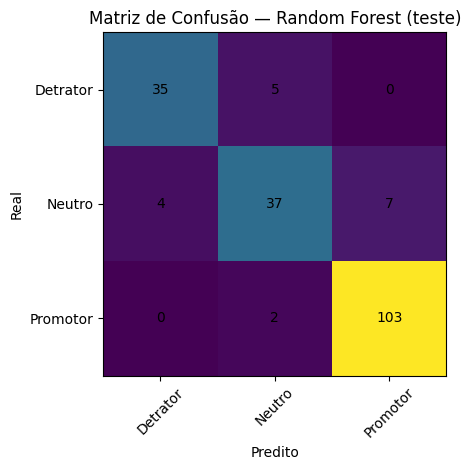

In [16]:
# 9.1 — Gráfico 1: Matriz de Confusão
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Detrator","Neutro","Promotor"]
y_pred_rf = pipe_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf, labels=labels)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de Confusão — Random Forest (teste)")
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
# anotar valores nas células
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


<a name="sec91b"></a>
## 9.1 Avaliação no Teste — Comparação de F1-macro

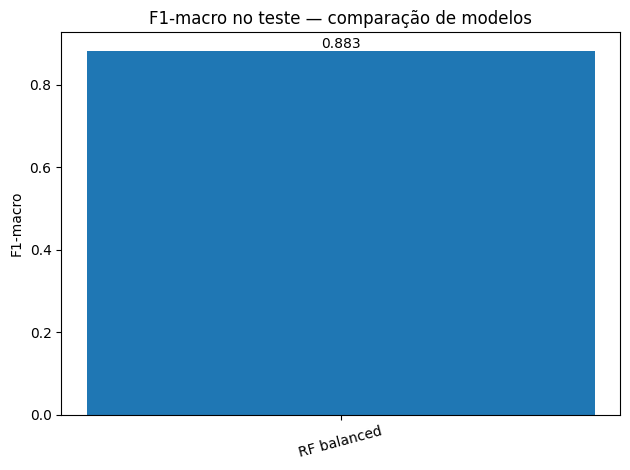

In [17]:
# 9.1 — Gráfico 2: F1-macro no teste (comparação de modelos)
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

scores = []
names  = []
models = [
    ("LR baseline", "pipe_baseline"),
    ("LR balanced", "pipe_lr_bal"),
    ("RF balanced", "pipe_rf"),
]

for label, var in models:
    if var in globals():
        y_pred = globals()[var].predict(X_test)
        f1m = f1_score(y_test, y_pred, average="macro")
        scores.append(f1m)
        names.append(label)

assert scores, "Nenhum modelo encontrado. Treine 8.1/8.2/8.3 antes."

plt.figure()
plt.bar(range(len(names)), scores)
plt.xticks(range(len(names)), names, rotation=15)
plt.title("F1-macro no teste — comparação de modelos")
plt.ylabel("F1-macro")
for i, v in enumerate(scores):
    plt.text(i, v, f"{v:.3f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()


<a name="sec92"></a>
## 9.2 Validação Cruzada (5-fold)
- Calcula o F1-macro em 5 folds no treino e plota um gráfico simples por fold.

F1-macro por fold: [np.float64(0.842), np.float64(0.826), np.float64(0.801), np.float64(0.87), np.float64(0.838)]
Média: 0.835  ±  Desvio: 0.023


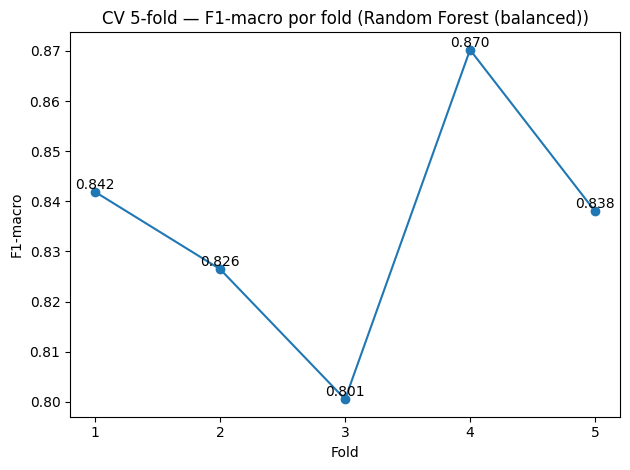

In [18]:
# 9.2 — Gráfico 3: CV 5-fold — F1-macro por fold (modelo campeão)

from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# escolhe o campeão disponível (prioriza RF; senão LR balanced; senão baseline)
model = None
title_model = None
if "pipe_rf" in globals():
    model = pipe_rf; title_model = "Random Forest (balanced)"
elif "pipe_lr_bal" in globals():
    model = pipe_lr_bal; title_model = "Logistic Regression (balanced)"
elif "pipe_baseline" in globals():
    model = pipe_baseline; title_model = "Logistic Regression (baseline)"
else:
    raise RuntimeError("Nenhum modelo encontrado. Treine 8.1/8.2/8.3.")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro", n_jobs=-1)

print("F1-macro por fold:", [round(s, 3) for s in scores])
print(f"Média: {scores.mean():.3f}  ±  Desvio: {scores.std():.3f}")

plt.figure()
plt.plot(range(1, len(scores)+1), scores, marker="o")
plt.title(f"CV 5-fold — F1-macro por fold ({title_model})")
plt.xlabel("Fold")
plt.ylabel("F1-macro")
for i, v in enumerate(scores, start=1):
    plt.text(i, v, f"{v:.3f}", ha="center", va="bottom")
plt.xticks(range(1, len(scores)+1))
plt.tight_layout()
plt.show()


<a name="sec93"></a>
## 9.3 Importância de Features + Insights por Marca
- Mostra o Top-15 de importância agregada por coluna original (numéricas 1:1; categóricas = soma das dummies do One-Hot daquela coluna).

,column,importance
0,Customer review sentiment score (overall),0.214220
1,Rating of the product,0.156316
2,Number of similar products purchased so far,0.118727
3,Brand of the product,0.112918
4,Average rating given to similar products,0.111955
5,Number of clicks on similar products,0.075796
6,Median purchasing price (in rupees),0.058310
7,Price of the product,0.054643
8,Season,0.033645
9,Geographical locations,0.024776


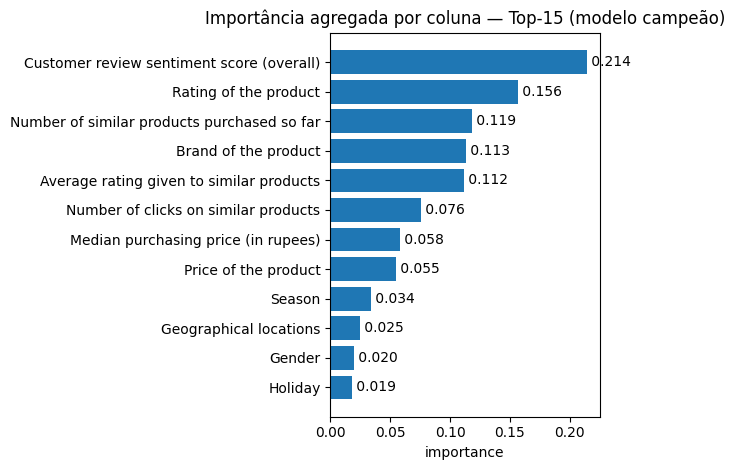

In [19]:
# 9.3 — Gráfico 4: Top-15 importâncias agregadas por coluna (usando o modelo campeão, preferindo RF)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) escolher o modelo que expõe feature_importances_ (prioriza RF)
clf = None
for name in ("pipe_rf", "best_model"):
    if name in globals():
        clf = globals()[name]
        break
assert clf is not None, "Modelo campeão não encontrado (pipe_rf/best_model). Treine 8.3 ou defina best_model = pipe_rf."

# 2) recuperar preprocess e modelo interno
ct = clf.named_steps["prep"]
rf = clf.named_steps["model"]
assert hasattr(rf, "feature_importances_"), "O modelo atual não expõe feature_importances_. Use RandomForest (8.3)."

# 3) nomes pós-preprocessamento (inclui prefixos 'num__' e 'cat__')
try:
    feat_names = ct.get_feature_names_out()
except Exception:
    # fallback: compõe manualmente (num + OHE(cat))
    num_names = list(ct.transformers_[0][2])
    ohe = ct.named_transformers_["cat"].named_steps["ohe"]
    cat_used = list(ct.transformers_[1][2])
    cat_names = [f"cat__{n}" for n in ohe.get_feature_names_out(cat_used)]
    feat_names = np.array([f"num__{n}" for n in num_names] + cat_names)

imps = rf.feature_importances_
assert len(imps) == len(feat_names), "Tamanho de importâncias ≠ número de features transformadas."

# 4) agregar por coluna original
#    - numéricas: "num__<col>" → <col>
#    - categóricas: "cat__<col>_<categoria>" → <col>
agg = {}

# garantir listas de referência
num_cols_ref = list(ct.transformers_[0][2])
cat_cols_ref = list(ct.transformers_[1][2])

for f, w in zip(feat_names, imps):
    f = str(f)
    if f.startswith("num__"):
        col = f.replace("num__", "", 1)
    elif f.startswith("cat__"):
        # encontra qual coluna categórica gerou essa dummy
        col = None
        for base in cat_cols_ref:
            prefix = f"cat__{base}_"
            if f.startswith(prefix):
                col = base
                break
        if col is None:
            col = "UNKNOWN_CAT"
    else:
        col = "UNKNOWN"
    agg[col] = agg.get(col, 0.0) + float(w)

agg_df = pd.DataFrame({"column": list(agg.keys()), "importance": list(agg.values())}) \
            .sort_values("importance", ascending=False) \
            .reset_index(drop=True)

# 5) exibir tabela Top-15
display(agg_df.head(15))

# 6) plot (horizontal), sem definir cores
topk = agg_df.head(15)
plt.figure()
plt.barh(topk["column"][::-1], topk["importance"][::-1])
plt.title("Importância agregada por coluna — Top-15 (modelo campeão)")
plt.xlabel("importance")
plt.ylabel("")
# anotar valores
for i, (col, val) in enumerate(zip(topk["column"][::-1], topk["importance"][::-1])):
    plt.text(val, i, f" {val:.3f}", va="center")
plt.tight_layout()
plt.show()


##9.3 — Gráfico 5: Top-12 dummies de marca por importância

- Mostra as 12 categorias de Brand of the product que mais pesam no modelo campeão (Random Forest).

,brand_dummy,importance
35,Sugar Cosmetics,0.007334
29,Patanjali Ayurved (Health Care),0.006052
43,Wildcraft,0.005956
36,The Moms Co.,0.005501
3,Dabur Chyawanprash,0.005472
10,HRX,0.004331
24,Max,0.004313
14,Johnson & Johnson,0.004235
16,Khadi Essentials,0.004202
38,Urban Ladder,0.004159


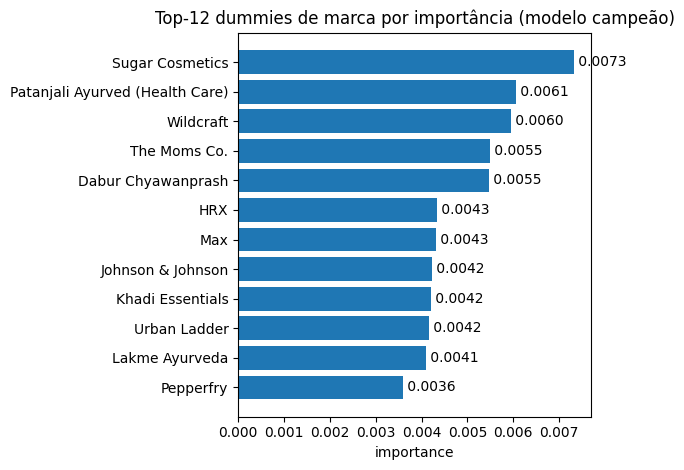

In [20]:
# 9.3 — Gráfico 5: Top-12 dummies de marca por importância (modelo campeão)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# escolher o modelo campeão (precisa expor feature_importances_)
clf = None
for name in ("pipe_rf", "best_model"):
    if name in globals():
        clf = globals()[name]
        break
assert clf is not None, "Modelo campeão não encontrado (pipe_rf/best_model). Treine 8.3 ou defina best_model = pipe_rf."

ct = clf.named_steps["prep"]
rf = clf.named_steps["model"]
assert hasattr(rf, "feature_importances_"), "O modelo atual não expõe feature_importances_. Use RandomForest (8.3)."

brand_col = "Brand of the product"

# nomes pós-preprocessamento
try:
    feat_names = ct.get_feature_names_out()
except Exception:
    # fallback: compõe nomes manualmente
    num_names = list(ct.transformers_[0][2])
    ohe = ct.named_transformers_["cat"].named_steps["ohe"]
    cat_used = list(ct.transformers_[1][2])
    cat_names = [f"cat__{n}" for n in ohe.get_feature_names_out(cat_used)]
    feat_names = np.array([f"num__{n}" for n in num_names] + cat_names)

imps = rf.feature_importances_
assert len(imps) == len(feat_names), "Tamanho de importâncias ≠ número de features transformadas."

# filtrar apenas dummies da coluna de marca (formato 'cat__Brand of the product_<categoria>')
prefix = f"cat__{brand_col}_"
mask = np.array([str(n).startswith(prefix) for n in feat_names])
brand_dummies = np.array([str(n).replace(prefix, "", 1) for n in feat_names[mask]])
brand_imps = imps[mask]

df = pd.DataFrame({"brand_dummy": brand_dummies, "importance": brand_imps}) \
        .sort_values("importance", ascending=False) \
        .head(12)

# tabela e gráfico
display(df)

plt.figure()
plt.barh(df["brand_dummy"][::-1], df["importance"][::-1])
plt.title("Top-12 dummies de marca por importância (modelo campeão)")
plt.xlabel("importance")
plt.ylabel("")
# anotar valores
for i, val in enumerate(df["importance"][::-1]):
    plt.text(val, i, f" {val:.4f}", va="center")
plt.tight_layout()
plt.show()


##9.3 Gráfico de quadrantes (Importância × F1 por marca)


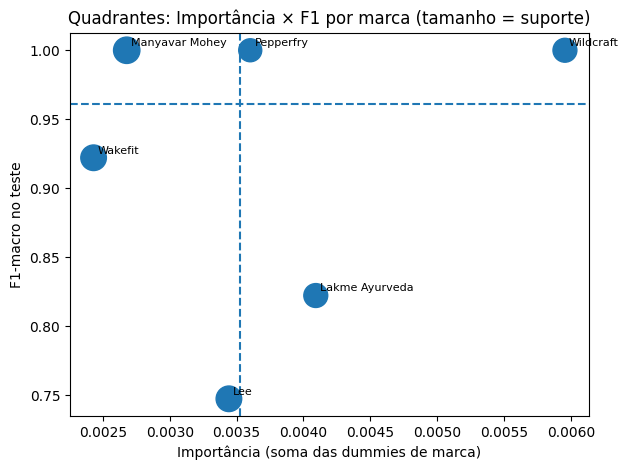

In [21]:
# 9.3 — Gráfico 6: Quadrantes (Importância × F1 por marca) — modelo campeão

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# 1) escolher modelo campeão (precisa expor feature_importances_)
clf = None
for name in ("pipe_rf", "best_model"):
    if name in globals():
        clf = globals()[name]
        break
assert clf is not None, "Modelo campeão não encontrado (pipe_rf/best_model)."
ct = clf.named_steps["prep"]
model = clf.named_steps["model"]
assert hasattr(model, "feature_importances_"), "O modelo atual não expõe feature_importances_. Use RandomForest (8.3)."

brand_col = "Brand of the product"
assert brand_col in X_test.columns, f"'{brand_col}' não está em X_test."

# 2) nomes pós-preprocessamento
try:
    feat_names = ct.get_feature_names_out()
except Exception:
    # fallback para compor nomes
    num_names = list(ct.transformers_[0][2])
    ohe = ct.named_transformers_["cat"].named_steps["ohe"]
    cat_used = list(ct.transformers_[1][2])
    cat_names = [f"cat__{n}" for n in ohe.get_feature_names_out(cat_used)]
    feat_names = np.array([f"num__{n}" for n in num_names] + cat_names)

imps = model.feature_importances_
assert len(imps) == len(feat_names), "len(importâncias) != len(features)."

# 3) importância por marca (somatório das dummies de marca)
prefix = f"cat__{brand_col}_"
mask = np.array([str(n).startswith(prefix) for n in feat_names])
brands = np.array([str(n).replace(prefix, "", 1) for n in feat_names[mask]])
brand_imps = imps[mask]

imp_df = (
    pd.DataFrame({"brand": brands, "importance": brand_imps})
    .groupby("brand", as_index=False)["importance"].sum()
)

# 4) desempenho por marca (F1-macro no TESTE), com suporte mínimo
min_support = 10
y_pred = clf.predict(X_test)
rows = []
for b, idx in X_test.groupby(brand_col).groups.items():
    n = len(idx)
    if n < min_support:
        continue
    yt = y_test.loc[idx]
    yp = pd.Series(y_pred, index=X_test.index).loc[idx]
    rows.append({"brand": b, "support": n, "f1_macro": f1_score(yt, yp, average="macro")})
perf_df = pd.DataFrame(rows)

# 5) merge + limiares
dfq = pd.merge(imp_df, perf_df, on="brand", how="inner")
assert not dfq.empty, "Sem marcas com suporte ≥ min_support para plot."
imp_thr = dfq["importance"].median()
f1_thr = dfq["f1_macro"].median()

# 6) scatter com linhas de mediana (tamanho ~ suporte)
sizes = 60 + 300 * (dfq["support"] / dfq["support"].max())

plt.figure()
plt.scatter(dfq["importance"], dfq["f1_macro"], s=sizes)
plt.axvline(imp_thr, linestyle="--")
plt.axhline(f1_thr, linestyle="--")

for _, r in dfq.iterrows():
    plt.annotate(r["brand"], (r["importance"], r["f1_macro"]), xytext=(3,3),
                 textcoords="offset points", fontsize=8)

plt.title("Quadrantes: Importância × F1 por marca (tamanho = suporte)")
plt.xlabel("Importância (soma das dummies de marca)")
plt.ylabel("F1-macro no teste")
plt.tight_layout()
plt.show()


## 9.4 Análise de Erros — visão geral


In [22]:
# 9.4.1 — Montar dataframe de avaliação (teste): y_true, y_pred, proba_max, conf_correct, + features-chave

import numpy as np
import pandas as pd

# escolher o campeão disponível (prioriza RF → LR balanced → LR baseline)
model = None
for name in ("pipe_rf", "pipe_lr_bal", "pipe_baseline"):
    if name in globals():
        model = globals()[name]
        model_name = name
        break
assert model is not None, "Nenhum modelo treinado (8.1/8.2/8.3)."

proba = model.predict_proba(X_test)
pred  = model.predict(X_test)
classes = list(model.classes_)

df_eval = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": pred,
    "proba_max": proba.max(axis=1),
    "pred_class": [classes[i] for i in np.argmax(proba, axis=1)],
}, index=X_test.index)

# anexar probabilidades por classe
for i, c in enumerate(classes):
    df_eval[f"proba_{c}"] = proba[:, i]

# anexar algumas features úteis para diagnóstico (ajuste à vontade)
cols_diag = [
    "Brand of the product",
    "Geographical locations",
    "Season",
    "Price of the product",
    "Customer review sentiment score (overall)",
    "Rating of the product",
]
for c in cols_diag:
    if c in X_test.columns:
        df_eval[c] = X_test[c]

df_eval["correct"] = (df_eval["y_true"] == df_eval["y_pred"])
print("Amostra do dataframe de avaliação:")
display(df_eval.head(10))


Amostra do dataframe de avaliação:


,y_true,y_pred,proba_max,pred_class,proba_Detrator,proba_Neutro,proba_Promotor,Brand of the product,Geographical locations,Season,Price of the product,Customer review sentiment score (overall),Rating of the product,correct
1347,Neutro,Neutro,0.9125,Neutro,0.0550,0.9125,0.0325,Lakme Ayurveda,plains,monsoon,600,0.70,4.4,True
1104,Promotor,Promotor,0.9900,Promotor,0.0000,0.0100,0.9900,Biovea,coastal,spring,700,0.90,4.8,True
1438,Detrator,Detrator,0.7450,Detrator,0.7450,0.2375,0.0175,Flying Machine,mountains,summer,800,0.15,3.6,True
1037,Promotor,Promotor,0.5875,Promotor,0.0525,0.3600,0.5875,Johnson & Johnson,plains,winter,1000,0.80,4.7,True
1270,Detrator,Detrator,0.8650,Detrator,0.8650,0.1350,0.0000,Lakme Ayurveda,plains,spring,600,0.10,3.7,True
16,Detrator,Detrator,0.7275,Detrator,0.7275,0.2550,0.0175,Pepe Jeans London,plains,summer,900,0.30,3.4,True
1383,Promotor,Promotor,1.0000,Promotor,0.0000,0.0000,1.0000,Lee,plains,summer,800,0.90,4.9,True
1267,Detrator,Detrator,0.5625,Detrator,0.5625,0.3650,0.0725,Moov,mountains,winter,700,0.40,4.3,True
1379,Promotor,Promotor,0.9925,Promotor,0.0000,0.0075,0.9925,Khadi Essentials,mountains,summer,800,0.80,4.7,True
151,Neutro,Neutro,0.9150,Neutro,0.0425,0.9150,0.0425,Johnson & Johnson,plains,summer,200,0.70,4.0,True


In [23]:
# 9.4.2 — Onde o modelo mais confunde? (pares real → predito, ordenado)

pairs = (
    df_eval.assign(pair=lambda d: d["y_true"] + " → " + d["y_pred"])
           .value_counts("pair")
           .rename("count")
           .reset_index()
           .sort_values("count", ascending=False)
)
display(pairs)

# tabela focada nos erros (exclui acertos na diagonal)
errors = pairs[pairs["pair"].apply(lambda s: s.split("→")[0].strip() != s.split("→")[1].strip())]
print("\nTop confusões (erros):")
display(errors.head(10))


,pair,count
0,Promotor → Promotor,103
1,Neutro → Neutro,37
2,Detrator → Detrator,35
3,Neutro → Promotor,7
4,Detrator → Neutro,5
5,Neutro → Detrator,4
6,Promotor → Neutro,2



Top confusões (erros):


,pair,count
3,Neutro → Promotor,7
4,Detrator → Neutro,5
5,Neutro → Detrator,4
6,Promotor → Neutro,2


Desempenho por Brand of the product (min_support=12)


,segment,support,f1_macro
1,Manyavar Mohey,14,1.000000
2,Wakefit,13,0.922078
0,Lee,13,0.747368


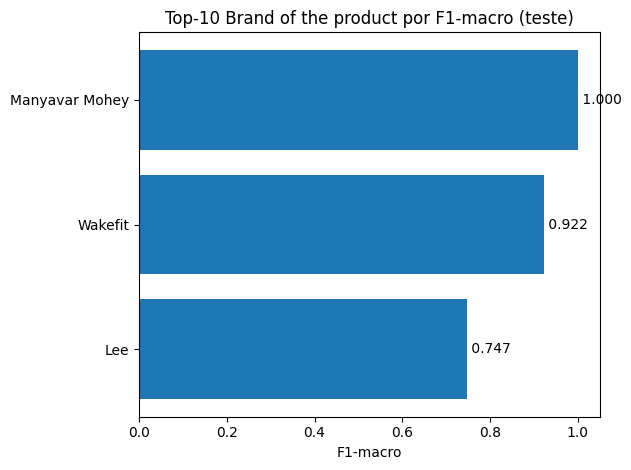

In [24]:
# 9.4.3 — Desempenho por segmento (ex.: Brand) com suporte mínimo

from sklearn.metrics import f1_score

segment_col = "Brand of the product"   # troque para "Geographical locations", "Season", etc.
min_support = 12                       # só avalia segmentos com >= 12 amostras no teste

assert segment_col in X_test.columns, f"Coluna não encontrada: {segment_col}"
rows = []
y_pred = df_eval["y_pred"]
for seg, idx in X_test.groupby(segment_col).groups.items():
    n = len(idx)
    if n < min_support:
        continue
    yt = y_test.loc[idx]
    yp = y_pred.loc[idx]
    rows.append({"segment": seg, "support": n, "f1_macro": f1_score(yt, yp, average="macro")})

seg_df = pd.DataFrame(rows).sort_values("f1_macro", ascending=False)
print(f"Desempenho por {segment_col} (min_support={min_support})")
display(seg_df.head(10))

# Gráfico: Top-10 segmentos por F1-macro
import matplotlib.pyplot as plt
topk = seg_df.head(10)
plt.figure()
plt.barh(topk["segment"][::-1], topk["f1_macro"][::-1])
plt.title(f"Top-10 {segment_col} por F1-macro (teste)")
plt.xlabel("F1-macro")
plt.ylabel("")
for i, v in enumerate(topk["f1_macro"][::-1]):
    plt.text(v, i, f" {v:.3f}", va="center")
plt.tight_layout()
plt.show()


#9.5 — Calibração de probabilidades (curvas de confiabilidade por classe)
- Plota uma curva por classe (uma figura por classe) e calcula ECE (Expected Calibration Error).

Classe: Detrator | ECE (10 bins) = 0.046


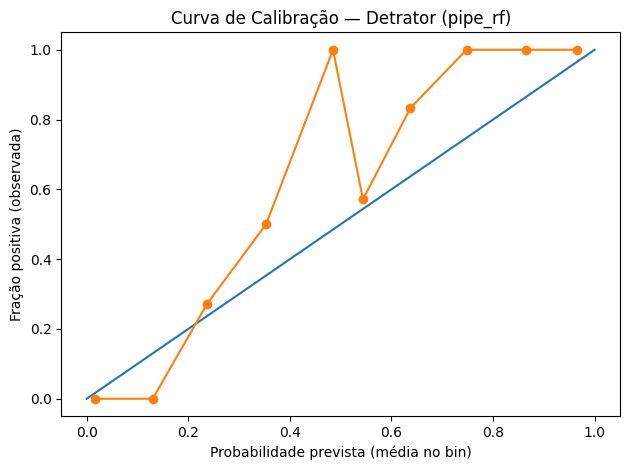

Classe: Neutro | ECE (10 bins) = 0.116


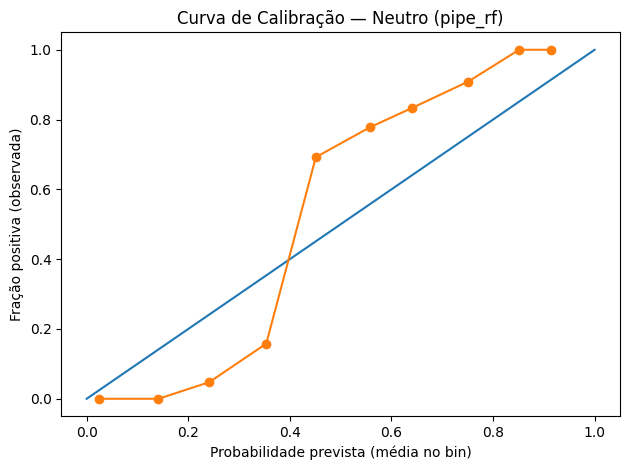

Classe: Promotor | ECE (10 bins) = 0.080


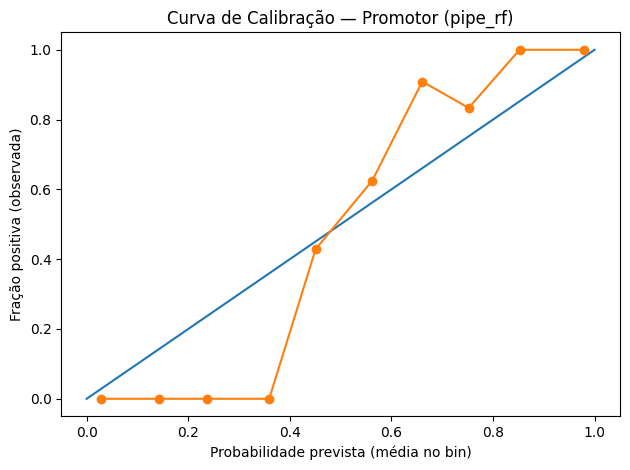

In [25]:
# 9.5 — Calibração de probabilidades (uma figura por classe)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# escolhe o melhor modelo disponível
model = None
for name in ("pipe_rf", "pipe_lr_bal", "pipe_baseline"):
    if name in globals():
        model = globals()[name]
        model_name = name
        break
assert model is not None, "Treine 8.1/8.2/8.3 antes."

proba = model.predict_proba(X_test)
classes = list(model.classes_)
y_true = y_test.values

def ece_binary(y_true_bin, prob, n_bins=10):
    bins = np.linspace(0, 1, n_bins+1)
    idx = np.digitize(prob, bins) - 1
    ece, n = 0.0, len(prob)
    for b in range(n_bins):
        mask = idx == b
        if not np.any(mask):
            continue
        conf = prob[mask].mean()
        acc  = y_true_bin[mask].mean()
        ece += (mask.sum()/n) * abs(conf - acc)
    return float(ece)

for c in classes:
    y_bin = (y_true == c).astype(int)
    p_c   = proba[:, classes.index(c)]

    frac_pos, mean_pred = calibration_curve(y_bin, p_c, n_bins=10, strategy="uniform")

    ece = ece_binary(y_bin, p_c, n_bins=10)
    print(f"Classe: {c} | ECE (10 bins) = {ece:.3f}")

    plt.figure()
    plt.plot([0,1],[0,1])
    plt.plot(mean_pred, frac_pos, marker="o")
    plt.title(f"Curva de Calibração — {c} ({model_name})")
    plt.xlabel("Probabilidade prevista (média no bin)")
    plt.ylabel("Fração positiva (observada)")
    plt.tight_layout()
    plt.show()


#9.6 — Threshold de confiança (“Revisar” os casos incertos)

- Define um limiar sobre proba_max: abaixo do limiar, marca como “Revisar”; acima, aceita a predição.
Mostra a troca (trade-off) entre cobertura (amostras aceitas) e qualidade (Accuracy/F1-macro nos aceitos) e sugere um limiar.

,threshold,coverage,accuracy,f1_macro
0,0.00,1.000000,0.906736,0.882854
1,0.05,1.000000,0.906736,0.882854
2,0.10,1.000000,0.906736,0.882854
3,0.15,1.000000,0.906736,0.882854
4,0.20,1.000000,0.906736,0.882854
5,0.25,1.000000,0.906736,0.882854
6,0.30,1.000000,0.906736,0.882854
7,0.35,1.000000,0.906736,0.882854
8,0.40,0.994819,0.911458,0.887293
9,0.45,0.989637,0.910995,0.885894


,threshold,coverage,accuracy,f1_macro
10,0.50,0.963731,0.919355,0.892692
11,0.55,0.901554,0.942529,0.919848
12,0.60,0.834197,0.962733,0.943507
13,0.65,0.751295,0.986207,0.977473
14,0.70,0.683938,0.984848,0.974015
15,0.75,0.616580,0.991597,0.979524
16,0.80,0.559585,1.000000,1.000000
17,0.85,0.502591,1.000000,1.000000
18,0.90,0.430052,1.000000,1.000000
19,0.95,0.357513,1.000000,1.000000



Sugestão A (maior F1 nos aceitos): threshold = 0.80
Sugestão B (cobertura ≥ 80%): threshold = 0.60


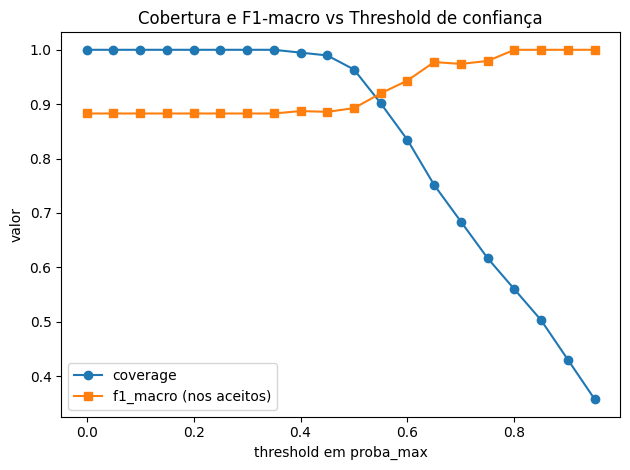

In [26]:
# 9.6 — Threshold de confiança: cobertura × qualidade

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# usar o melhor modelo carregado acima (model, proba, classes, y_true)
assert model is not None and 'proba' in globals(), "Execute a 9.5 primeiro (ou compute proba do modelo campeão)."

y_pred = model.predict(X_test)
proba_max = proba.max(axis=1)

rows = []
thresholds = np.round(np.linspace(0.0, 0.95, 20), 2)
for t in thresholds:
    mask = proba_max >= t
    kept = mask.sum()
    cov  = kept / len(proba_max)
    if kept >= 1:
        acc = accuracy_score(y_true[mask], y_pred[mask])
        f1m = f1_score(y_true[mask], y_pred[mask], average="macro")
    else:
        acc = np.nan; f1m = np.nan
    rows.append({"threshold": float(t), "coverage": float(cov), "accuracy": float(acc), "f1_macro": float(f1m)})

df_thr = pd.DataFrame(rows)
display(df_thr.head(10))
display(df_thr.tail(10))

# sugestão de limiar:
# 1) opção A — maximizar F1-macro nos aceitos (ignorando NaN)
df_valid = df_thr.dropna(subset=["f1_macro"])
t_best_f1 = df_valid.loc[df_valid["f1_macro"].idxmax(), "threshold"]

# 2) opção B — alvo de cobertura mínima (ex.: 80%), melhor F1 nessa faixa
cov_min = 0.80
cands = df_valid[df_valid["coverage"] >= cov_min]
t_cov = cands.loc[cands["f1_macro"].idxmax(), "threshold"] if len(cands)>0 else float("nan")

print(f"\nSugestão A (maior F1 nos aceitos): threshold = {t_best_f1:.2f}")
if not np.isnan(t_cov):
    print(f"Sugestão B (cobertura ≥ {cov_min:.0%}): threshold = {t_cov:.2f}")
else:
    print(f"Sugestão B: não há thresholds com cobertura ≥ {cov_min:.0%}")

# gráfico único: curvas de cobertura e F1-macro vs threshold
plt.figure()
plt.plot(df_thr["threshold"], df_thr["coverage"], marker="o", label="coverage")
plt.plot(df_thr["threshold"], df_thr["f1_macro"], marker="s", label="f1_macro (nos aceitos)")
plt.title("Cobertura e F1-macro vs Threshold de confiança")
plt.xlabel("threshold em proba_max")
plt.ylabel("valor")
plt.legend()
plt.tight_layout()
plt.show()


# 9) Resultados e Validação

-**Avaliação no teste**

-	Executado relatório de classificação e matriz de confusão.

-	Comparativo (F1-macro): RF (0.883) > LR balanced (0.824) > LR baseline (0.807).


-	Observações:

•Promotor: muito bem classificado (F1 alto).

•	Neutro: melhorou com class_weight e melhor ainda com a RF (F1 ≈ 0.804).

•	Detrator: bom equilíbrio de precision/recall.

•	Gráficos adicionados: Matriz de Confusão + Barras de F1-macro por modelo.



-**Validação Cruzada (5-fold, no treino)**

•	F1-macro médio ≈ 0.835 ± 0.023 para o campeão → desempenho estável.

•	Gráfico adicionado: F1 por fold.


-**Importâncias e Insights**


- Importância agregada:

1) Sentimento da review,

2) Rating do produto,

3) Compras similares,

4) Marca,

5) Média de rating de similares.

6) Satisfação/qualidade e afinidade pesam mais que preço/contexto.


- Marcas:

•	Gráfico Top-12 dummies de marca por importância.

•	Quadrantes (Importância × F1 por marca) para ações táticas (escalar, corrigir, testar exposição).





<a name="sec10"></a>
# 10) Entrega & Operação



<a name="sec101"></a>
## 10.1 Salvar Artefatos (modelo + metadados)

- Exportar `mvp_model.joblib` (pipeline completo) e `mvp_metadata.json` (classes, shapes, colunas, métricas). Servem para inferência e versionamento.

In [27]:
## 10.1 Salvar Artefatos (modelo + metadados) — versão auto-contida

import json, time, joblib
from pathlib import Path
from sklearn.metrics import f1_score, accuracy_score

# 1) Reunir candidatos treinados
candidates = []
if "pipe_baseline" in globals(): candidates.append(("LR baseline", pipe_baseline))
if "pipe_lr_bal"  in globals(): candidates.append(("LR balanced", pipe_lr_bal))
if "pipe_rf"      in globals(): candidates.append(("RF balanced", pipe_rf))
assert candidates, "Nenhum modelo treinado (rode as etapas 8.1/8.2/8.3)."

# 2) Escolher o melhor no TESTE (F1-macro; desempate por accuracy)
scores = []
for name, mdl in candidates:
    y_pred = mdl.predict(X_test)
    f1m = f1_score(y_test, y_pred, average="macro")
    acc = accuracy_score(y_test, y_pred)
    scores.append((name, float(f1m), float(acc), mdl))

best_name, best_f1, best_acc, best_model = sorted(scores, key=lambda t: (t[1], t[2]))[-1]

# 3) Salvar pipeline completo
joblib.dump(best_model, "mvp_model.joblib")

# 4) Metadados (classes, shapes, colunas)
classes = getattr(best_model, "classes_", None)
if classes is None:
    classes = best_model.named_steps["model"].classes_

meta = {
    "model_label": best_name,
    "created_utc": time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime()),
    "train_shape": list(X_train.shape),
    "test_shape": list(X_test.shape),
    "num_cols": list(num_cols),
    "cat_cols": list(cat_cols),
    "classes": [str(c) for c in classes],
    "metrics_test": {"f1_macro": best_f1, "accuracy": best_acc},
}

Path("mvp_metadata.json").write_text(json.dumps(meta, indent=2, ensure_ascii=False))

print(f"✅ Modelo salvo: mvp_model.joblib  | Campeão: {best_name}")
print(f"   F1-macro={best_f1:.3f}  Acc={best_acc:.3f}")
print("✅ Metadados salvos: mvp_metadata.json")


✅ Modelo salvo: mvp_model.joblib  | Campeão: RF balanced
   F1-macro=0.883  Acc=0.907
✅ Metadados salvos: mvp_metadata.json


<a name="sec102"></a>
## 10.2 Inferência (predict_event)

- Função que recebe um evento (mesmas chaves de treino), retorna **classe prevista** e **probabilidades**. Valida campos e ordem.

In [28]:
## 10.2 Inferência (predict_event)

import json, joblib, pandas as pd

def load_model(path="mvp_model.joblib"):
    return joblib.load(path)

def load_metadata(path="mvp_metadata.json"):
    with open(path, "r") as f:
        return json.load(f)

def _as_dataframe(event: dict, num_cols, cat_cols):
    # valida chaves e ordem
    req = list(num_cols) + list(cat_cols)
    miss = set(req) - set(event)
    if miss:
        raise ValueError(f"Campos ausentes: {sorted(miss)}")
    return pd.DataFrame([{k: event[k] for k in req}])

def predict_event(event: dict, model=None, meta=None):
    model = model or load_model()
    meta  = meta  or load_metadata()
    df_row = _as_dataframe(event, meta["num_cols"], meta["cat_cols"])
    proba = model.predict_proba(df_row)[0]
    pred  = model.predict(df_row)[0]
    return {
        "predicted_class": pred,
        "probabilities": dict(zip(model.classes_, map(float, proba)))
    }

# --- exemplo mínimo usando uma linha real do X_test ---
_model = load_model()
_meta  = load_metadata()
sample_event = X_test.iloc[0].to_dict()  # garante chaves certas
out = predict_event(sample_event, _model, _meta)
print("Exemplo:", out)


Exemplo: {'predicted_class': 'Neutro', 'probabilities': {'Detrator': 0.055, 'Neutro': 0.9125, 'Promotor': 0.0325}}


<a name="sec103"></a>
## 10.3 Monitoramento & Drift

- `monitor_baseline.json` guarda a “fotografia” do treino (bins/frequências). `log_prediction(...)` registra previsões; `monitor_snapshot(...)` calcula **métricas da janela** e **drift** (**PSI** num., **JSD** cat.).

### 10.3.1 Baseline de Monitoramento (TREINO)

**Objetivo:** Congelar a “fotografia” do **treino** para comparar a produção depois.  
Criado e salvo `monitor_baseline.json` com a distribuição esperada das features.

**Cálculo:**
- **Numéricas:** definido*bins* por **quantis (10)** no `X_train` e guardado a **frequência relativa** em cada bin.  
- **Categóricas:** guardado as **frequências relativas** de cada categoria (inclui `NaN`).  
- **Sanidade:** há *fallbacks* para colunas vazias/constantes (evita divisão por zero).

**Saída persistida:**
- Arquivo: `monitor_baseline.json`  
- Estrutura:
  - `num_bins[col] = {"edges": [...], "expected": [...]}`  
  - `cat_freq[col] = {"expected": {"catA": pA, "catB": pB, ...}}`

**Importância:**
- Na **10.3.3**, comparado o que chega em produção vs. baseline via:
  - **PSI** (numéricas): `< 0.10 ok`, `0.10–0.25 atenção`, `> 0.25 alto`.  
  - **JSD** (categóricas): `≈ 0 ok`, `> 0.10 atenção`.

**Ordem de uso**
1. (já feito) Treinar e escolher o modelo (Seção 8–9).  
2. **Rodar esta 10.3.1** para salvar o baseline do **treino**.  
3. **10.3.2**: registrar previsões com `log_prediction(...)` (gera `pred_log.parquet`).  
4. **10.3.3**: executar `monitor_snapshot(...)` para ver métricas e drift.

**Boas práticas**
- Regerar o baseline **somente ao promover** um novo modelo/dataset.  
- O *timestamp* de log é salvo em **UTC**.  
- Categorias novas serão contadas em produção; o JSD captura o desvio.


In [29]:
## 10.3 Monitoramento & Drift (baseline + log + snapshot)

import json, time, uuid
import numpy as np, pandas as pd
from pathlib import Path
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 10.3.1 Baseline (roda 1x após o treino) — bins numéricos + frequências categóricas do TREINO
import numpy as np, json
from pathlib import Path

def _num_bins(series, n_bins=10):
    qs = np.linspace(0, 1, n_bins+1)
    vals = series.dropna().values
    if len(vals) == 0:
        return np.array([0.0, 1.0])  # fallback seguro
    edges = np.unique(np.quantile(vals, qs))
    if len(edges) < 2:
        edges = np.array([vals.min(), vals.max()])
    return edges

baseline = {"num_bins": {}, "cat_freq": {}}

# Numéricas: quantis + distribuição esperada
for col in num_cols:
    edges = _num_bins(X_train[col])
    cnt, _ = np.histogram(X_train[col].dropna().values, bins=edges)
    total = cnt.sum()
    expected = (cnt / total).tolist() if total > 0 else [0.0]*(len(edges)-1)
    baseline["num_bins"][col] = {"edges": edges.tolist(), "expected": expected}

# Categóricas: frequências relativas
for col in cat_cols:
    freq = X_train[col].value_counts(normalize=True, dropna=False).to_dict()
    baseline["cat_freq"][col] = {"expected": {str(k): float(v) for k, v in freq.items()}}

Path("monitor_baseline.json").write_text(json.dumps(baseline, indent=2, ensure_ascii=False))
print("✅ Baseline salvo: monitor_baseline.json")

# 10.3.2 Logging de previsões (após cada inferência)
LOG_PATH = Path("pred_log.parquet")

def log_prediction(event: dict, pred_class: str, proba: dict, y_true: str|None=None, uid: str|None=None):
    row = {"ts": time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime()),
           "uid": uid or str(uuid.uuid4()),
           "pred": pred_class, "y_true": y_true}
    # probabilidades
    for k,v in proba.items(): row[f"proba_{k}"] = float(v)
    # features (sem PII)
    for c in (num_cols + cat_cols): row[c] = event.get(c, None)
    df_row = pd.DataFrame([row])
    if LOG_PATH.exists():
        all_df = pd.concat([pd.read_parquet(LOG_PATH), df_row], ignore_index=True)
    else:
        all_df = df_row
    all_df.to_parquet(LOG_PATH, index=False)
    return row["uid"]

print("✅ Função de log pronta: log_prediction(...)-> pred_log.parquet")

# 10.3.3 Snapshot (métricas e drift da janela recente)
def _psi(expected: np.ndarray, actual: np.ndarray, eps=1e-8):
    expected = np.asarray(expected, float) + eps
    actual   = np.asarray(actual,   float) + eps
    return float(np.sum((actual - expected) * np.log(actual/expected)))

def _jsd(p: dict, q: dict, eps=1e-12):
    keys = set(p)|set(q)
    P = np.array([p.get(k,0.0) for k in keys], float); P/= (P.sum()+eps)
    Q = np.array([q.get(k,0.0) for k in keys], float); Q/= (Q.sum()+eps)
    M = 0.5*(P+Q)
    def _kl(a,b): a=a+eps; b=b+eps; return np.sum(a*np.log(a/b))
    return float(0.5*_kl(P,M)+0.5*_kl(Q,M))

def monitor_snapshot(window_rows: int = 200, show: bool = True):
    assert LOG_PATH.exists(), "pred_log.parquet ainda não existe. Use log_prediction(...) após inferir."
    logs = pd.read_parquet(LOG_PATH).tail(window_rows)
    metrics = {}
    valid = logs.dropna(subset=["y_true"])
    if len(valid)>0:
        y_true = valid["y_true"]; y_pred = valid["pred"]
        metrics["accuracy"] = float(accuracy_score(y_true, y_pred))
        metrics["f1_macro"] = float(f1_score(y_true, y_pred, average="macro"))
        metrics["report"]   = classification_report(y_true, y_pred, output_dict=True)
    else:
        metrics["info"] = "Sem y_true na janela."

    base = json.loads(Path("monitor_baseline.json").read_text())
    drift_num, drift_cat = {}, {}

    for col, cfg in base["num_bins"].items():
        edges = np.array(cfg["edges"]); exp = np.array(cfg["expected"])
        cnt,_ = np.histogram(logs[col].dropna().values, bins=edges)
        act = cnt/(cnt.sum() if cnt.sum()>0 else 1)
        drift_num[col] = {"psi": _psi(exp, act), "n": int(logs[col].notna().sum())}

    for col, cfg in base["cat_freq"].items():
        exp = cfg["expected"]
        act = logs[col].fillna("NaN").value_counts(normalize=True).to_dict()
        drift_cat[col] = {"jsd": _jsd(exp, act), "n": int(logs[col].notna().sum())}

    out = {"rows": int(len(logs)), "metrics": metrics, "drift_num": drift_num, "drift_cat": drift_cat}
    if show:
        print(f"[SNAPSHOT] últimas {out['rows']} linhas")
        if "accuracy" in metrics:
            print(f"Accuracy={metrics['accuracy']:.3f} | F1-macro={metrics['f1_macro']:.3f}")
        else:
            print(metrics["info"])
        print("\nDRIFT numérico (PSI): <0.10 ok | 0.10–0.25 atenção | >0.25 alto")
        for k,v in drift_num.items(): print(f"  {k}: PSI={v['psi']:.3f} (n={v['n']})")
        print("\nDRIFT categórico (JSD): ~0 ok | >0.10 atenção")
        for k,v in drift_cat.items(): print(f"  {k}: JSD={v['jsd']:.3f} (n={v['n']})")
    return out

print("✅ Monitor pronto: monitor_snapshot(window_rows=200)")

# --- exemplo de uso (opcional) ---
# uid = log_prediction(X_test.iloc[0].to_dict(), out["predicted_class"], out["probabilities"], y_true=y_test.iloc[0])
# snap = monitor_snapshot(200)


✅ Baseline salvo: monitor_baseline.json
✅ Função de log pronta: log_prediction(...)-> pred_log.parquet
✅ Monitor pronto: monitor_snapshot(window_rows=200)


### 10.3.2 Logging de Previsões (amostra com y_true)


In [30]:
# 10.3.2 — Gerar logs de previsões (com y_true)
# (rode DEPOIS de 10.3.1, pois usa o baseline já salvo)

# escolhe o melhor modelo disponível
mdl = pipe_rf if "pipe_rf" in globals() else (pipe_lr_bal if "pipe_lr_bal" in globals() else pipe_baseline)

# gera ~50 registros de log a partir do conjunto de teste
idxs = list(X_test.index)[:50]
probas = mdl.predict_proba(X_test.loc[idxs])
preds  = mdl.predict(X_test.loc[idxs])

for i, idx in enumerate(idxs):
    event = X_test.loc[idx].to_dict()
    proba = dict(zip(mdl.classes_, map(float, probas[i])))
    pred  = preds[i]
    ytrue = y_test.loc[idx]
    log_prediction(event, pred, proba, y_true=ytrue)

print("✅ 50 previsões logadas em", LOG_PATH)


✅ 50 previsões logadas em pred_log.parquet


### 10.3.3 Snapshot de Saúde (métricas + drift)


In [31]:
# 10.3.3.1 — Snapshot de saúde
snap = monitor_snapshot(window_rows=200, show=True)


[SNAPSHOT] últimas 50 linhas
Accuracy=0.900 | F1-macro=0.891

DRIFT numérico (PSI): <0.10 ok | 0.10–0.25 atenção | >0.25 alto
  Number of clicks on similar products: PSI=0.168 (n=50)
  Number of similar products purchased so far: PSI=0.110 (n=50)
  Average rating given to similar products: PSI=0.122 (n=50)
  Median purchasing price (in rupees): PSI=1.431 (n=50)
  Rating of the product: PSI=0.136 (n=50)
  Customer review sentiment score (overall): PSI=0.155 (n=50)
  Price of the product: PSI=0.098 (n=50)

DRIFT categórico (JSD): ~0 ok | >0.10 atenção
  Gender: JSD=0.002 (n=50)
  Brand of the product: JSD=0.106 (n=50)
  Holiday: JSD=0.005 (n=50)
  Season: JSD=0.010 (n=50)
  Geographical locations: JSD=0.003 (n=50)


In [32]:
# 10.3.3.2) Quadro de Métricas Finais
#Resumo comparativo dos modelos no conjunto de **teste** (ordenado por F1-macro).
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

models = []
if "pipe_baseline" in globals(): models.append(("LR baseline", pipe_baseline))
if "pipe_lr_bal"  in globals(): models.append(("LR balanced", pipe_lr_bal))
if "pipe_rf"      in globals(): models.append(("RF balanced", pipe_rf))
assert models, "Nenhum modelo encontrado. Treine as etapas 8.1/8.2/8.3."

labels = ["Detrator","Neutro","Promotor"]
rows = []
for name, mdl in models:
    y_pred = mdl.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    f1_per = f1_score(y_test, y_pred, average=None, labels=labels)
    rows.append({
        "Modelo": name,
        "Accuracy": round(acc, 3),
        "F1-macro": round(f1m, 3),
        "F1-Detrator": round(float(f1_per[0]), 3),
        "F1-Neutro": round(float(f1_per[1]), 3),
        "F1-Promotor": round(float(f1_per[2]), 3),
        "Suporte (teste)": int(len(y_test))
    })

df_metrics = pd.DataFrame(rows).sort_values("F1-macro", ascending=False).reset_index(drop=True)
display(df_metrics)


,Modelo,Accuracy,F1-macro,F1-Detrator,F1-Neutro,F1-Promotor,Suporte (teste)
0,RF balanced,0.907,0.883,0.886,0.804,0.958,193


## 10.4 Plano de Re-Treino

- Gatilhos: queda de F1, PSI/JSD altos, categorias novas. Cadência mensal (ou por evento). Canário, versionamento e rollback definidos.

**Cadência:** mensal (ou trimestral se volume for baixo).

**Gatilhos (qualquer 1 por 2 snapshots seguidos):**
- Queda de **F1-macro > 0,03** vs. baseline **(0,883)**.
- Queda de **F1(Neutro) > 0,05** vs. baseline **(0,804)**.
- **PSI > 0,25** em qualquer numérica ou média das top-3 > **0,15**.
- **JSD > 0,10** em *Brand* ou *Geographical locations*.
- **> 5%** de categorias **desconhecidas** em alguma categórica principal.
- Mudança relevante de catálogo/temporada.

**Dados do re-treino:**
- Janela **3–6 meses** (ou 1 ciclo sazonal), **stratify** por classe; balancear leve se necessário.
- **Holdout**: 10–15% mais recente (ou última semana) para teste final.
- (Opcional) **peso temporal** para exemplos mais recentes.

**Treino & Tuning (leve):**
- Reutilizar o **mesmo Pipeline** (One-Hot + Scaler) + **RF balanceada**.
- Buscar: `n_estimators ∈ {300, 500}`, `max_depth ∈ {None, 12, 20}` (CV estratificada).

**Critérios de aceite (no holdout):**
- **F1-macro ≥ baseline + 0,01**.
- **Não** piorar **F1(Neutro)** (ou queda ≤ 0,01 com ganho ≥ 0,02 no macro).
- **Accuracy** ≥ baseline − 0,01.
- Sanity checks: matriz de confusão sem colapso de classe; **PSI/JSD** pós-treino aceitáveis.

**Promoção & Rollback:**
- **Canário**: 5–10% do tráfego por **24–72h**, comparando métricas.
- **Versionar** artefatos: `mvp_model_vX.Y.Z.joblib` + `mvp_metadata_vX.Y.Z.json`.
- **Rollback** imediato para versão anterior se o canário piorar.

---



##📝**10.5 Conclusão do MVP**

Objetivo **atingido**. Modelo vencedor: **Random Forest (balanced)** com bom equilíbrio entre classes e estabilidade em CV. Artefatos e monitoramento prontos para piloto.

- **Vencedor:** **Random Forest (class_weight='balanced')**.  
- **Desempenho (teste):** **Accuracy 0,907 • F1-macro 0,883 • F1(Neutro) 0,804**; **CV 5-fold 0,835 ± 0,023**.  
- **Drivers principais:** **sentimento da review**, **rating do produto**, **histórico de compras similares**; preço/contexto com menor impacto relativo.  
- **Artefatos prontos:** `mvp_model.joblib` + `mvp_metadata.json`; código de **inferência**, **monitoramento** e **gatilho de re-treino** implementados.

**Conclusão:** o objetivo do MVP foi **atingido** com qualidade adequada para **piloto (canário)** em produção, mantendo monitoramento de métricas e drift.  
**Próximos opcionais:** calibração de probabilidades (Platt/Isotonic) se forem usados limiares; dashboards de operação; testes A/B de exposição por marca/categoria.



<a name="sec11"></a>
##✅ 11) Checklist — Perguntas & Respostas

**1) Qual é o objetivo do modelo e qual métrica principal foi usada? Por quê?**  
Classificar eventos em **Detrator / Neutro / Promotor**. Métrica principal: **F1-macro**, pois dá peso igual às 3 classes e reduz o viés da maioria (Promotor). Observamos também **F1(Neutro)** por ser a “zona cinza”.

**2) Qual o estado dos dados após ETL? Houve nulos/duplicatas/outliers?**  
Pós-ETL: **769 linhas × 12 features** (7 numéricas, 5 categóricas). **Duplicatas removidas: 456**; **linhas inválidas: 249**. Nulos: **0%** nas colunas usadas. Outliers (IQR) principalmente em **preço**; decisão: **não** tratar no `df` para evitar vazamento (monitorar em produção).

**3) Como o alvo foi definido e como estão as proporções? Há desbalanceamento?**  
A partir da probabilidade original: `≤0.60 Detrator`, `(0.60, 0.80] Neutro`, `>0.80 Promotor`. Distribuição: **Promotor 54.6%**, **Neutro 24.8%**, **Detrator 20.5%** (leve desbalanceamento).

**4) Como foi feita a validação?**  
Split **75/25 estratificado** (`random_state=42`). Métricas reportadas no **teste**. Validação adicional com **CV 5-fold** no treino (**F1-macro ≈ 0.835 ± 0.023**).

**5) Quais modelos foram testados e qual venceu?**  
- **LR baseline**  
- **LR (class_weight='balanced')**  
- **Random Forest (class_weight='balanced')** → **vencedor**  
No **teste**: **RF** obteve **F1-macro ≈ 0.883** e **Accuracy ≈ 0.907**; **F1(Neutro) ≈ 0.804**.

**6) Qual o pré-processamento aplicado? Há risco de vazamento?**  
`StandardScaler` em numéricas e `OneHotEncoder(handle_unknown="ignore")` em categóricas via **ColumnTransformer** **dentro do Pipeline**. Ajuste feito **só no treino** → **sem vazamento**. Categorias novas são ignoradas com segurança.

**7) Principais variáveis (insight do modelo)**  
Maior contribuição: **sentimento da review**, **rating do produto**, **histórico de similares (compras/ratings)**. Preço/contexto tiveram impacto menor relativo. Em marcas, variação de performance/impacto foi analisada (Top dummies + quadrantes).

**8) O modelo comete quais erros típicos? Há segmentos críticos?**  
Maiores confusões ocorrem entre **Neutro ↔ Promotor** (e, em menor grau, Neutro ↔ Detrator). Desempenho por **marca** mostra variações; recomendamos atenção a segmentos com **baixo suporte** no teste.

**9) Probabilidades estão calibradas? Há limiar de “revisão”?**  
Curvas de calibração por classe adicionadas. Limiar de confiança pode ser definido via análise **cobertura × F1** (seção 9.6). Sugerir **`THRESHOLD_REVIEW`** quando houver processo humano downstream.

**10) Como será a entrega e a inferência?**  
Artefatos: **`mvp_model.joblib`** (pipeline completo) + **`mvp_metadata.json`**. Função **`predict_event`** recebe um evento (mesmas chaves de treino), valida campos e retorna **classe + probabilidades**.

**11) Como será o monitoramento em produção?**  
Criado **`monitor_baseline.json`** (bins numéricos e frequências categóricas do **treino**).  
Funções: **`log_prediction`** (gera `pred_log.parquet`) e **`monitor_snapshot`** (métricas de janela + **PSI/JSD**).  
Sinais: **PSI < 0.10 ok**; **0.10–0.25 atenção**; **>0.25 alto**. **JSD ~0 ok**; **>0.10 atenção**.

**12) Quando re-treinar? Critérios de aceite?**  
Re-treinar **mensalmente** ou se houver: queda de **F1-macro > 0.03**, queda de **F1(Neutro) > 0.05**, **PSI > 0.25** (qualquer numérica), **JSD > 0.10** (categóricas-chave), ou **>5%** de categorias desconhecidas.  
Aceite do novo modelo (holdout mais recente): **F1-macro ≥ baseline + 0.01**, sem piora relevante em **F1(Neutro)**.

**13) Limitações e próximos passos**  
Tamanho modesto do dataset; marcas com **baixo suporte**; probabilidades podem requerer **calibração** se usadas em limiares decisórios; explorar **tuning leve** da RF e features de **recência/frequência** (RFM) em versões futuras.
